In [7]:
import pandas as pd
import numpy as np
import ripleyk
import libpysal as ps
import pointpats
import matplotlib.pyplot as plt

In [9]:
hemocyte_coordinates = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/hemocyte_coordinates.csv", sep="\t",header=0)
abdomen_coordinates = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/abdomen_coordinates.csv", sep="\t",header=0) 

In [15]:
#Add experimental group info to hemocyte detections
image_condition = pd.Series(abdomen_coordinates.condition.values, index=abdomen_coordinates.Image).to_dict()
hemocyte_coordinates['condition'] = hemocyte_coordinates['Image'].map(image_condition)
hemocyte_coordinates[['fly','section','reporter']] = hemocyte_coordinates['Image'].str.split('_',expand=True)

In [26]:
#Get numpy arrays
lstat_outs = {}

for image in hemocyte_coordinates['Image'].unique():
    print(image)
    coords = np.array(hemocyte_coordinates.loc[hemocyte_coordinates['Image']==image][["centroid_x_zeroscaled","centroid_y_zeroscaled"]])
    try:
        lstat = pointpats.l_test(coords, keep_simulations=False)
        lstat_outs[image] = lstat
    except:
        pass

75C_6_FITC.tif
75C_5_FITC.tif
86F_6_FITC.tif
75F_1_FITC.tif
75E_6_FITC.tif
76B_1_FITC.tif
76A_6_FITC.tif
85H_1_FITC.tif
85H_2_FITC.tif
73F_6_FITC.tif
84G_3_FITC.tif
84G_4_FITC.tif
75E_1_FITC.tif
75D_5_FITC.tif
76B_4_FITC.tif
76B_5_FITC.tif
80C_5_FITC.tif
80C_4_FITC.tif
84B_2_FITC.tif
84B_1_FITC.tif
72F_5_FITC.tif
84D_2_FITC.tif
84D_1_FITC.tif
86D_3_FITC.tif
86D_4_FITC.tif
72C_2_FITC.tif
72C_3_FITC.tif
75B_4_FITC.tif
75B_3_FITC.tif
84F_3_FITC.tif
84F_2_FITC.tif
90D_5_FITC.tif
90E_1_FITC.tif
86F_1_FITC.tif
86F_2_FITC.tif
73C_1_FITC.tif
72A_5_FITC.tif
72A_4_FITC.tif
75A_3_FITC.tif
75A_2_FITC.tif
72D_3_FITC.tif
72D_4_FITC.tif
73E_3_FITC.tif
73E_5_FITC.tif
90B_2_FITC.tif
86C_2_FITC.tif
90B_1_FITC.tif
86C_3_FITC.tif
85E_1_FITC.tif
90C_4_FITC.tif
90C_5_FITC.tif
72F_1_FITC.tif
72F_2_FITC.tif
73B_2_FITC.tif
73B_1_FITC.tif
84E_3_FITC.tif
84E_2_FITC.tif
90D_4_FITC.tif
90D_3_FITC.tif
84B_5_FITC.tif
84C_1_FITC.tif
72C_5_FITC.tif
72C_4_FITC.tif
73F_3_FITC.tif
73F_2_FITC.tif
86E_1_FITC.tif
86D_5_FITC

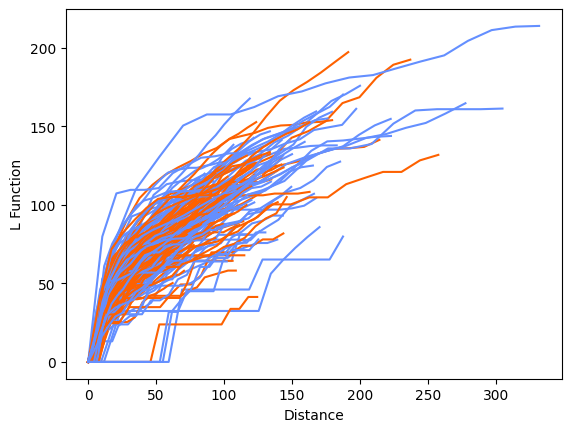

In [35]:
for image in lstat_outs.keys():
    if image_condition[image] == "Fed":
        plt.plot(lstat_outs[image].support, lstat_outs[image].statistic, color='#648fff')
    else:
        plt.plot(lstat_outs[image].support, lstat_outs[image].statistic, color='#fe6100')
plt.xlabel('Distance')
plt.ylabel('L Function')
plt.show()

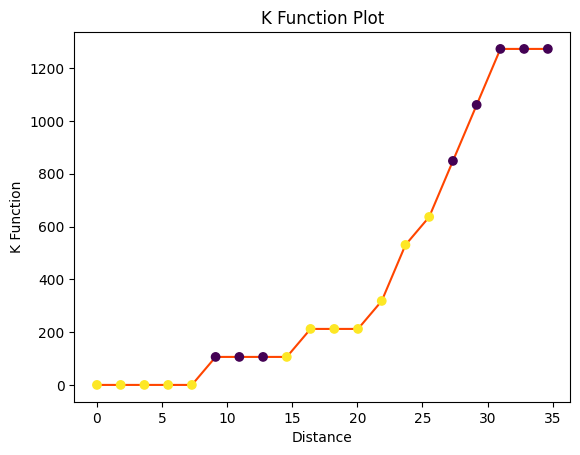

In [8]:
#plt.plot(k_test.support, k_test.simulations.T, color='k', alpha=.01)
plt.plot(kout.support, kout.statistic, color='orangered')

plt.scatter(kout.support, kout.statistic, 
            cmap='viridis', c=kout.pvalue < .05,
            zorder=4 # make sure they plot on top
           )

plt.xlabel('Distance')
plt.ylabel('K Function')
plt.title('K Function Plot')
plt.show()